# Musber Ahmed Sadman
**ID- 2215151038**

**Sec- 7A2**

**Batch- 51**

**Semester- Spring**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load and Prepare the CIFAR-10 Dataset
print("Loading CIFAR-10 dataset...")
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Number of classes: {len(class_names)}")

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 10


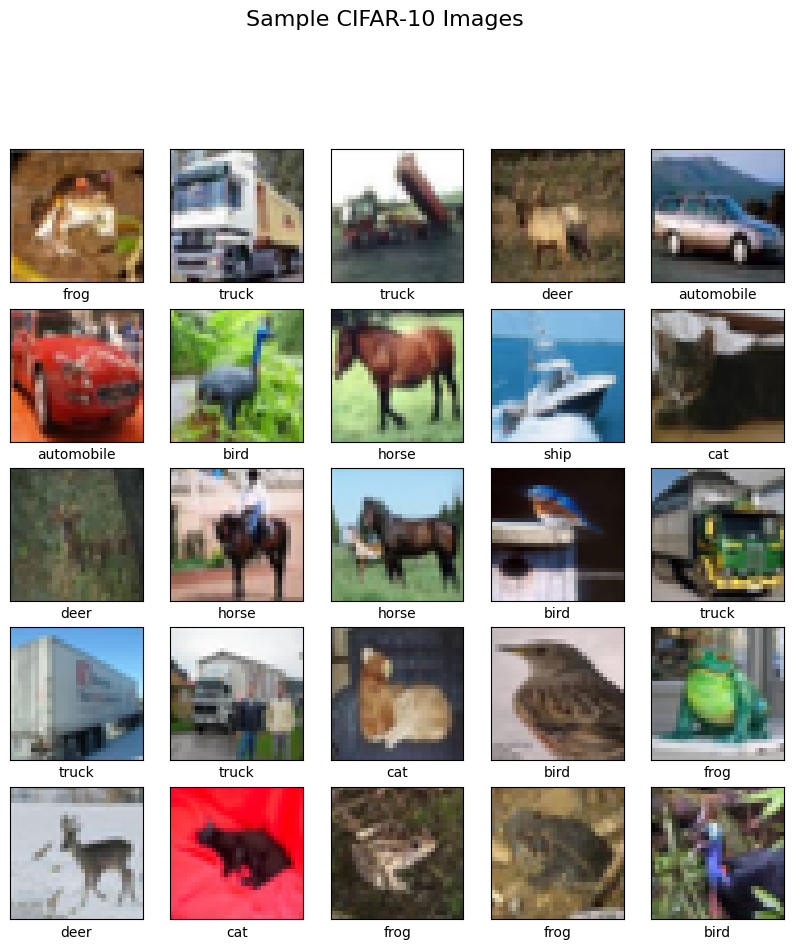

In [4]:
#Visualize Sample Data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The labels are arrays, so we need to flatten them for class_names indexing
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Sample CIFAR-10 Images", y=1.02, fontsize=16)
plt.show()

In [5]:
#Build the Convolutional Neural Network (CNN) Model
model = models.Sequential()

In [6]:
#Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

#Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Convolutional Block 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Flatten the output to feed into Dense layers
model.add(layers.Flatten())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #Because there are 10 classes

In [8]:
#Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Train the Model
print("\nTraining the model...")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

#Evaluate the Model
print("\nEvaluating the model...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


Training the model...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3309 - loss: 1.7959 - val_accuracy: 0.5635 - val_loss: 1.2191
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5745 - loss: 1.1958 - val_accuracy: 0.6011 - val_loss: 1.1053
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6482 - loss: 1.0013 - val_accuracy: 0.6644 - val_loss: 0.9483
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6876 - loss: 0.8917 - val_accuracy: 0.6784 - val_loss: 0.9593
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7156 - loss: 0.8072 - val_accuracy: 0.6930 - val_loss: 0.8923
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7373 - loss: 0.7585 - val_accuracy: 0.7083 - val_loss: 0.8555
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7527 - loss: 0.7080 - val_accuracy: 0.7119 - val_loss: 0.8486
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accur

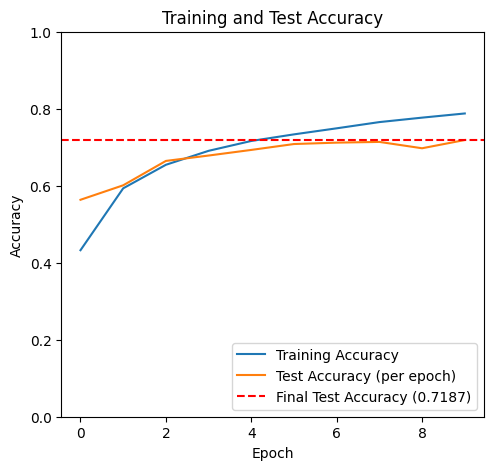

In [10]:
#Plot Training History
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# In this specific CIFAR-10 setup, 'val_accuracy' is the accuracy on the test set per epoch
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy (per epoch)')
# Plot the final test accuracy as a horizontal line
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Final Test Accuracy ({test_acc:.4f})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("Training and Test Accuracy")

plt.show()